In [63]:
#Load the libraries
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [39]:
#Load the directories.
base_dir = "C:/Users/fiko2/Desktop/CVAI Projects/CVAI1/chest_xray" 
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

#Directories for visualizing the test dataset.
test_normal_directory = os.path.join(test_dir, "NORMAL")
test_pneumonia_directory = os.path.join(test_dir, "PNEUMONIA")

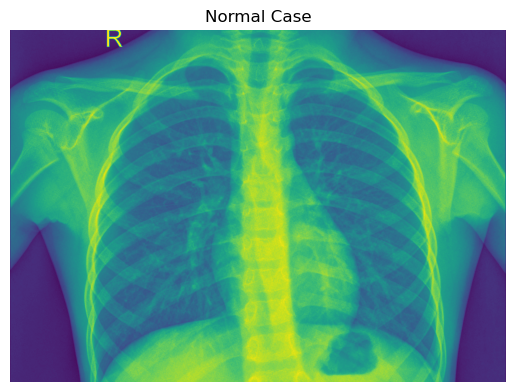

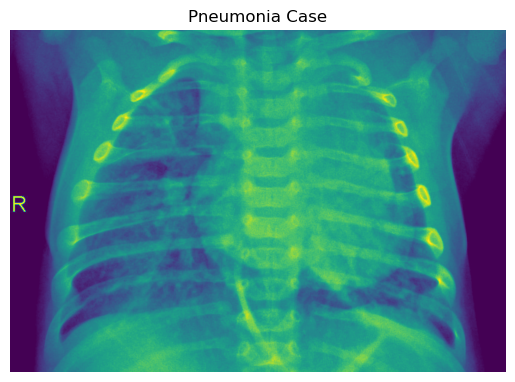

In [64]:
#Visualizing some samples.

#Get the first normal images.
normal_image_path = os.path.join(test_normal_directory, os.listdir(test_normal_directory)[0])
pneumonia_image_path = os.path.join(test_pneumonia_directory, os.listdir(test_pneumonia_directory)[0]) 

#Load the images.
normal = Image.open(normal_image_path)
pneumonia = Image.open(pneumonia_image_path)

#Visualize normal
normal_plot = plt.figure()
plt.imshow(normal),
plt.title("Normal Case"),
plt.axis("off")

#Visualize pneumonia
pneumonia_plot = plt.figure()
plt.imshow(pneumonia),
plt.title("Pneumonia Case"),
plt.axis("off")

plt.show(normal_plot)
plt.show(pneumonia_plot)

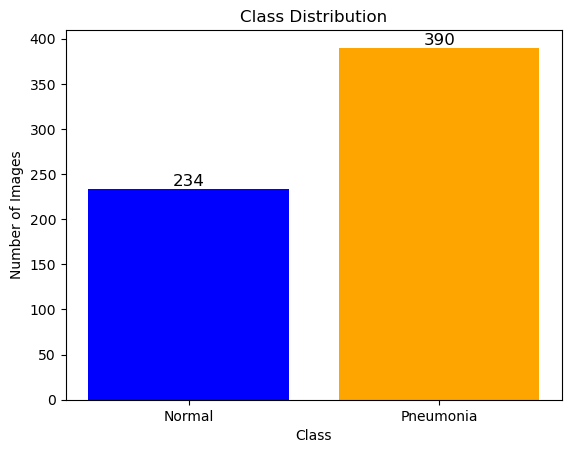

In [ ]:
#Visualizing the test data.

#Count the number of cases.
count_normal = len(os.listdir(test_normal_directory))
count_pneumonia = len(os.listdir(test_pneumonia_directory))

#Preparing for plotting by adding classes and counts.
plot_categories = ["Normal", "Pneumonia"]
plot_category_counts = [count_normal, count_pneumonia]

# Create the bar chart
Class_chart = plt.bar(plot_categories, plot_category_counts, color=["blue", "orange"])

#Display the count of each class on top of the bar and center the values for each bar.
for bar, count in zip(Class_chart, plot_category_counts):
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(count), ha = "center", va = "bottom", fontsize = 12)

#Add title and labels.
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")

#Visualize.
plt.show()

In [ ]:
#Preparing the data.

#Augmenting the training data.
trainDG = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

#Loading the training data.
train_generator = trainDG.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = "binary"
)

#Rescaling the test and validation data.
val_test_DG = ImageDataGenerator(rescale=1./255)

#Loading the validation data.
val_generator = val_test_DG.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = "binary"
)

#Loading the test data.
test_generator = val_test_DG.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = "binary",
    shuffle = False 
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
#Build the model.

#Base using Xception.
base = tf.keras.applications.Xception(weights = "imagenet", include_top = False, input_shape = (150, 150, 3))

for layer in base.layers[ :-20]:
    layer.trainable = False

model = Sequential([
    base,
    Dropout(0.2),
    Flatten(),
    Dense(256, activation = "relu"),
    Dropout(0.2),
    Dense(128, activation = "relu"),
    Dropout(0.2),
    Dense(64, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

# Compile the model
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 5, 5, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 5, 5, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,010,153 (129.74 MB)

 Trainable params: 20,475,049 (78.11 MB)

 Non-trainable params: 13,535,104 (51.63 MB)

In [68]:
#Fitting the model.
history = model.fit(train_generator, epochs = 25, verbose = 1, validation_data = val_generator)

Epoch 1/25
326/326 ━━━━━━━━━━━━━━━━━━━━ 101s 299ms/step - accuracy: 0.8243 - loss: 0.4297 - val_accuracy: 0.9375 - val_loss: 0.2219
Epoch 2/25
326/326 ━━━━━━━━━━━━━━━━━━━━ 131s 402ms/step - accuracy: 0.9356 - loss: 0.1898 - val_accuracy: 0.9375 - val_loss: 0.1876
Epoch 3/25
326/326 ━━━━━━━━━━━━━━━━━━━━ 302s 927ms/step - accuracy: 0.9469 - loss: 0.1635 - val_accuracy: 0.6250 - val_loss: 0.8853
Epoch 4/25
326/326 ━━━━━━━━━━━━━━━━━━━━ 184s 562ms/step - accuracy: 0.9493 - loss: 0.1365 - val_accuracy: 0.9375 - val_loss: 0.1213
Epoch 5/25
326/326 ━━━━━━━━━━━━━━━━━━━━ 89s 273ms/step - accuracy: 0.9624 - loss: 0.1151 - val_accuracy: 0.8125 - val_loss: 0.3426
Epoch 6/25
326/326 ━━━━━━━━━━━━━━━━━━━━ 135s 413ms/step - accuracy: 0.9530 - loss: 0.1351 - val_accuracy: 1.0000 - val_loss: 0.0863
Epoch 7/25
326/326 ━━━━━━━━━━━━━━━━━━━━ 84s 257ms/step - accuracy: 0.9604 - loss: 0.1071 - val_accuracy: 0.8750 - val_loss: 0.2590
Epoch 8/25
326/326 ━━━━━━━━━━━━━━━━━━━━ 128s 392ms/step - accuracy: 0.9640 - l

In [ ]:
#Make predictions using the test dataset.
test_generator.reset()
predictions = model.predict(test_generator)

#Round the predictions to integer 0 and 1, since this is a binary classification problem.
predicted_classes = np.round(predictions).astype(int) 

#Take the class names and labels.
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate a classification report
creport = classification_report(true_classes, predicted_classes, target_names = class_labels)
print("Classification Report:\n", creport)

# Confusion Matrix
cmatrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", cmatrix)

accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step
Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.92      0.90      0.91       234
   PNEUMONIA       0.94      0.95      0.95       390

    accuracy                           0.93       624
   macro avg       0.93      0.93      0.93       624
weighted avg       0.93      0.93      0.93       624

Confusion Matrix:
 [[211  23]
 [ 19 371]]
Accuracy: 93.27%


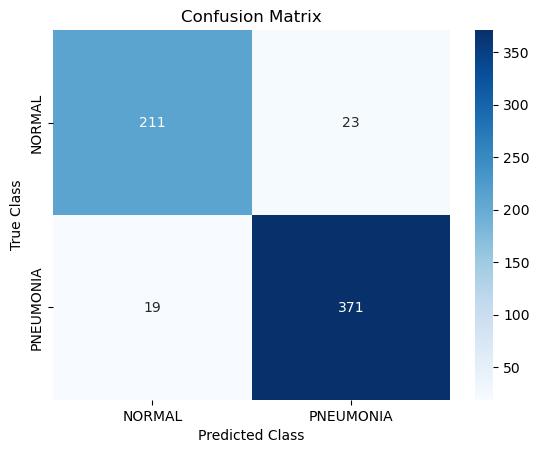

In [71]:
#Better visualizing the confusion matrix.
sns.heatmap(cmatrix, annot = True, fmt = "d", cmap = "Blues", 
            xticklabels = class_labels, yticklabels = class_labels)

#Add labels and display.
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()